In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
import numpy as np

# First Approach

In [2]:
file_path = r'C:\Users\Stavros\Desktop\Eden Library\eden-library-fruit-counting-adjustment\Datasets for testing and research.xlsx'

# Read all sheets into a dictionary
initial_df = pd.read_excel(file_path, sheet_name=None)
type(initial_df)

dict

In [3]:
# all data in one dataset
processed_df = pd.concat(initial_df.values(), axis=0, ignore_index=True) 

In [4]:
# Drop the datetime column
def drop_time(x):
    column_name = pd.to_datetime('2023-09-11 00:00:00')
    
    if column_name in x.columns:
        x = x.drop(column_name, axis=1)
        print(f"Column '{column_name}' successfully dropped.")
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")
    return x

In [5]:
# Drop the unnecessary columns
processed_df.drop(columns=['Unnamed: 5','Growth stage','Unnamed: 4','Cluster','Correction','Final clusters','Unnamed: 6','Bud','Inflorescence','Cluster Count','Cluster Count'],inplace=True)
processed_df.drop(columns=['Station',55,75,83,84,7,60,71,53,'Cluster count',"Yield","Yield (g)"],inplace=True)
processed_df.drop(columns=['Bud '],inplace=True)
processed_df = drop_time(processed_df)

Column '2023-09-11 00:00:00' successfully dropped.


In [6]:
# Our processed dataframe
processed_df

,Tree,Ground Truth,Number of manual annotations,AI detections
0,1.0,39,23.0,12.0
1,2.0,52,23.0,11.0
2,3.0,46,20.0,9.0
3,4.0,41,24.0,12.0
4,5.0,48,20.0,11.0
...,...,...,...,...
415,26.0,20,13.0,13.0
416,27.0,13,14.0,19.0
417,28.0,20,18.0,21.0
418,29.0,3,12.0,17.0


## Heatmap

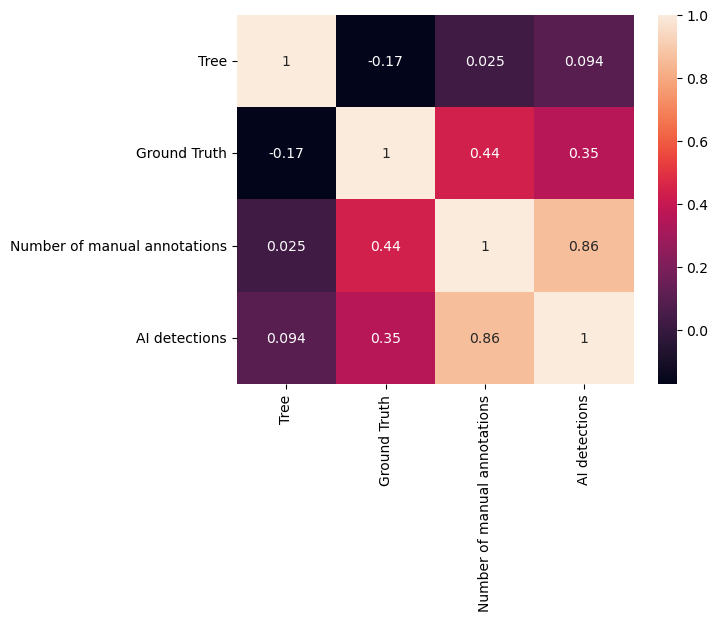

In [7]:
sns.heatmap(processed_df.corr(),annot=True);

## Pairplot

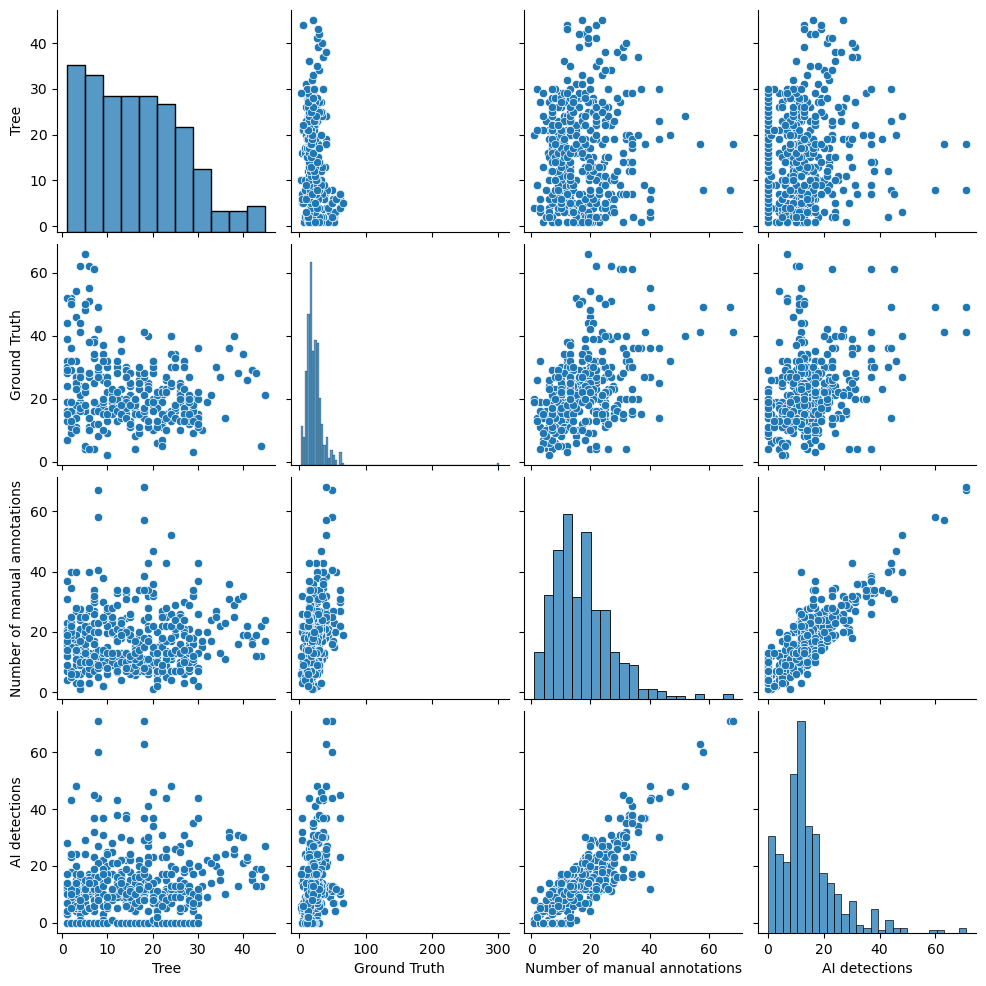

In [8]:
sns.pairplot(processed_df);

In [9]:
processed_df.describe()

,Tree,Ground Truth,Number of manual annotations,AI detections
count,419.000000,420.000000,419.000000,419.000000
mean,15.978520,22.919048,17.247017,14.599045
std,10.352265,17.535048,10.024394,10.802560
min,1.000000,2.000000,1.000000,0.000000
25%,7.000000,15.000000,10.000000,8.000000
50%,15.000000,20.000000,15.000000,13.000000
75%,23.000000,28.000000,22.000000,18.000000
max,45.000000,301.000000,68.000000,71.000000


# Processing the data per variety

### We find the variety from the initial df

In [10]:
# Pinot
df_pinot=initial_df['Melipilla 261023'].copy()
df_pinot.drop(columns=['Unnamed: 5','Growth stage',55,'Station'],inplace=True)

In [11]:
# Portugieser
df_Portugieser_75=initial_df['Mayer 28623'].copy()
df_Portugieser_75.drop(columns=['Unnamed: 4','Growth stage','Cluster',75],inplace=True)
df_Portugieser_83=initial_df['Gruenstadt 9823'].copy()
df_Portugieser_83.drop(columns=['Correction','Growth stage','Cluster',83],inplace=True)
df_Portugieser_84=initial_df['Gruenstadt 30823'].copy()
df_Portugieser_84.drop(columns=['Unnamed: 4','Growth stage','Cluster',84],inplace=True)
Port_dfs=[df_Portugieser_75,df_Portugieser_83,df_Portugieser_84]

In [12]:
# Dunkelfelder
initial_df['Obrigheim 9823'].drop(initial_df['Obrigheim 9823'].index[[1,15]], inplace=True)
df_xxx_84=initial_df['Obrigheim 30823'].copy()
df_xxx_84.drop(columns=['Unnamed: 4','Growth stage','Cluster',84],inplace=True)
df_xxx_83=initial_df['Obrigheim 9823'].copy()
df_xxx_83.drop(columns=['Unnamed: 4','Growth stage','Cluster',83],inplace=True)
XXX_dfs=[df_xxx_83,df_xxx_84]
df_xxx = pd.concat([df_xxx_83, df_xxx_84])
df_xxx.reset_index(inplace=True)
df_xxx.drop(columns= 'index', inplace = True)

In [13]:
# Cabernet
df_CS_83=initial_df['Asselheim 9823'].copy()
df_CS_83.drop(columns=['Unnamed: 4','Growth stage','Cluster',83],inplace=True)
df_CS_84=initial_df['Asselheim 30823'].copy()
df_CS_84.drop(columns=['Unnamed: 4','Growth stage','Cluster',84],inplace=True)

In [14]:
# Sauvignon Blanc
df_SB_7=initial_df['Grape 1 31323'].copy()
df_SB_7.drop(columns=['Final clusters','Yield','Unnamed: 6','Growth stage','Bud',7],inplace=True)
df_SB_60=initial_df['Grape 1 19523'].copy()
df_SB_60.drop(columns=['Final clusters','Yield','Unnamed: 6','Growth stage','Inflorescence',60],inplace=True)
df_SB_71=initial_df['Grape 1 22623'].copy()
df_SB_71.drop(columns=['Final clusters','Yield','Unnamed: 6','Growth stage','Cluster',71],inplace=True)
df_SB_75=initial_df['Grape 1 11723'].copy()
df_SB_75.drop(columns=['Final clusters','Yield','Unnamed: 6','Growth stage','Cluster',75],inplace=True)

In [15]:
# Merlot
df_merlot_83=initial_df['AsselheimNorth 9823'].copy()
df_merlot_83.drop(columns=['Growth stage','Cluster',83],inplace=True)
df_merlot_84=initial_df['AsselheimNorth 30823'].copy()
df_merlot_84.drop(columns=['Unnamed: 4','Growth stage','Cluster',84],inplace=True)
df_merlot_bud=initial_df['Grape 2 27423'].copy()
df_merlot_bud.drop(columns=['Unnamed: 4','Growth stage','Bud '],inplace=True)
df_merlot_bud=drop_time(df_merlot_bud)
df_merlot_53=initial_df['Grape 2 15523'].copy()
df_merlot_53.drop(columns=['Unnamed: 4',53,'Growth stage','Inflorescence'],inplace=True)

Column '2023-09-11 00:00:00' successfully dropped.


In [16]:
# Moschofilero
df_Moscho_Bud=initial_df['Grape 3 27423'].copy()
df_Moscho_Bud.drop(columns=['Cluster Count','Yield','Unnamed: 6'],inplace=True)
df_Moscho_Bud=drop_time(df_Moscho_Bud)
df_Mocho_53=initial_df['Grape 3 15523'].copy()
df_Mocho_53.drop(columns=['Cluster count','Yield (g)','Unnamed: 6','Growth stage','Inflorescence',53],inplace=True)

Column '2023-09-11 00:00:00' successfully dropped.


### Feature engineering

In [17]:
# Portugieser
df_Portugieser_75['variety']='Portugieser'
df_Portugieser_75['GS']=75
df_Portugieser_75['field']='Mayer'
df_Portugieser_75['date']='28_6_23'
df_Portugieser_83['variety']='Portugieser'
df_Portugieser_83['GS']=83
df_Portugieser_83['field']='Gruenstadt'
df_Portugieser_83['date']='9_8_23'
df_Portugieser_84['variety']='Portugieser'
df_Portugieser_84['GS']=84
df_Portugieser_84['field']='Gruenstadt'
df_Portugieser_84['date']='30_8_23'
df_Portugieser=pd.concat([df_Portugieser_75, df_Portugieser_83, df_Portugieser_84])
df_Portugieser.reset_index(inplace=True)
df_Portugieser.drop(columns='index',inplace=True)

In [18]:
# Merlot
df_merlot_53['variety']='Merlot'
df_merlot_53['GS']='53'
df_merlot_53['field']='Grape_2'
df_merlot_53['date']='15_5_23'
df_merlot_83['variety']='Merlot'
df_merlot_83['GS']='83'
df_merlot_83['field']='AsselheimNorth'
df_merlot_83['date']='9_8_23'
df_merlot_84['variety']='Merlot'
df_merlot_84['GS']='84'
df_merlot_84['field']='AsselheimNorth'
df_merlot_84['date']='30_8_23'
df_merlot_bud['variety']='Merlot'
df_merlot_bud['GS']= 7
df_merlot_bud['field']='Grape_2'
df_merlot_bud['date']='27_4_23'
df_Merlot=pd.concat([df_merlot_bud, df_merlot_84, df_merlot_83,df_merlot_53])
df_Merlot.reset_index(inplace=True)
df_Merlot.drop(columns = 'index', inplace=True)

In [19]:
# Cabernet
df_CS_83['variety'] = "Cabernet_Sauvignon"
df_CS_83['GS'] = 83
df_CS_83['field'] = "Asselheim"
df_CS_83['date'] = "09_08_23"
df_CS_84['variety'] = "Cabernet_Sauvignon"
df_CS_84['GS'] = 84
df_CS_84['field'] = "Asselheim"
df_CS_84['date'] = "30_08_23"
df_CS = pd.concat([df_CS_83, df_CS_84])
df_CS.reset_index(inplace=True)
df_CS.drop(columns = 'index', inplace=True)

In [20]:
# Sauvignon Blanc
df_SB_7['variety']= "Sauvignon_Blanc"
df_SB_7["GS"] = 7
df_SB_7['field'] = 'Grape_1'
df_SB_7['date'] = '31_3_23'
df_SB_60['variety'] = "Sauvignon_Blanc"
df_SB_60['GS'] = 60
df_SB_60['field'] = 'Grape_1'
df_SB_60['date'] = '19_5_23'
df_SB_71['variety'] = "Sauvignon_Blanc"
df_SB_71['GS'] = 71
df_SB_71['field'] = 'Grape_1'
df_SB_71['date'] = '22_6_23'
df_SB_75['variety'] = "Sauvignon_Blanc"
df_SB_75['GS'] = 75
df_SB_75['field'] = "Grape_1"
df_SB_75['date'] = "11_7_23"
df_SB = pd.concat([df_SB_60, df_SB_7, df_SB_71, df_SB_75])
df_SB.reset_index(inplace=True)
df_SB.drop(columns = 'index', inplace=True)

In [21]:
# Pinot
df_pinot['variety'] = "Pinot_Noir"
df_pinot['GS'] = 55
df_pinot['field'] = "Melipilla"
df_pinot['date'] = "26_10_23"

In [22]:
# Moschofilero
df_Mocho_53['variety'] = "Moschofilero"
df_Mocho_53['GS'] = 53
df_Mocho_53['field'] = "Grape_3"
df_Mocho_53['date'] = "15_05_23"
df_Moscho_Bud['variety'] = "Moschofilero"
df_Moscho_Bud['GS'] = 7
df_Moscho_Bud['field'] = "Grape_3"
df_Moscho_Bud['date'] = "27_04_23"
df_Moscho_Bud.drop(columns= 'Growth stage', inplace = True)
df_Moscho_Bud.drop(columns= 'Bud', inplace= True)
df_Moscho = pd.concat([df_Mocho_53, df_Moscho_Bud])
df_Moscho.reset_index(inplace=True)
df_Moscho.drop(columns= 'index', inplace = True)

In [23]:
# Dunkelfelder
df_xxx_83['variety'] = "Dunkelfelder"
df_xxx_83['GS'] = 83
df_xxx_83['field'] = "Obrigheim"
df_xxx_83['date'] = "09_08_23"
df_xxx_84['variety'] = "Dunkelfelder"
df_xxx_84['GS'] = 84
df_xxx_84['field'] = "Obrigheim"
df_xxx_84['date'] = "30_08_23"
df_Dunkelfelder = pd.concat([df_xxx_83, df_xxx_84])
df_Dunkelfelder.reset_index(inplace=True)
df_Dunkelfelder.drop(columns= 'index', inplace = True)

In [24]:
# Final dataframe to work on, saved as excel
df_work=pd.concat([df_Dunkelfelder,df_Moscho,df_SB,df_CS,df_pinot,df_Merlot,df_Portugieser])
df_work.reset_index(inplace=True)
df_work.drop(columns= 'index', inplace = True)
df_work.to_csv('Work_data.csv',encoding='utf-8', index=False)
df_work

,Tree,Ground Truth,Number of manual annotations,AI detections,variety,GS,field,date
0,1.0,7,7.0,3.0,Dunkelfelder,83,Obrigheim,09_08_23
1,3.0,25,15.0,20.0,Dunkelfelder,83,Obrigheim,09_08_23
2,4.0,19,3.0,3.0,Dunkelfelder,83,Obrigheim,09_08_23
3,5.0,4,20.0,29.0,Dunkelfelder,83,Obrigheim,09_08_23
4,6.0,38,13.0,13.0,Dunkelfelder,83,Obrigheim,09_08_23
...,...,...,...,...,...,...,...,...
413,19.0,23,34.0,41.0,Portugieser,84,Gruenstadt,30_8_23
414,20.0,32,47.0,46.0,Portugieser,84,Gruenstadt,30_8_23
415,21.0,6,6.0,7.0,Portugieser,84,Gruenstadt,30_8_23
416,22.0,23,27.0,31.0,Portugieser,84,Gruenstadt,30_8_23
